In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mpl 
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd 

In [2]:
from datetime import datetime

In [24]:
births = pd.read_csv('births.csv')

In [25]:
births['births'].head()

0    4046
1    4440
2    4454
3    4548
4    4548
Name: births, dtype: int64

In [10]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [11]:
quartiles = np.percentile(births['births'], [25, 50, 75])
quartiles

array([4358. , 4814. , 5289.5])

In [28]:
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
print(mu)
print(sig)
st = '(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)'
births = births.query(st)

4814.0
689.31


In [29]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [30]:
births['day'] = births['day'].astype(int)

In [31]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [32]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

In [33]:
births.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [34]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head(10)

births
1 1   4009.225
  2   4247.400
  3   4500.900
  4   4571.350
  5   4603.625
  6   4668.150
  7   4706.925
  8   4629.650
  9   4537.775
  10  4591.700

In [35]:
births_by_date.index = [datetime(2012, month, day) for month, day in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


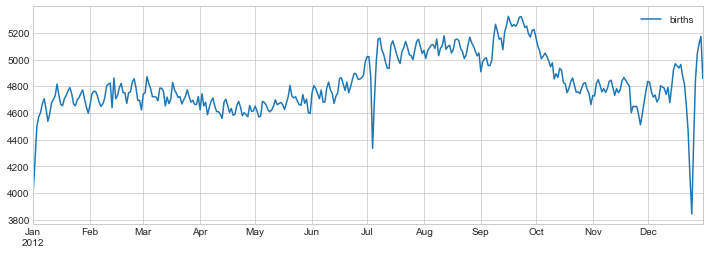

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

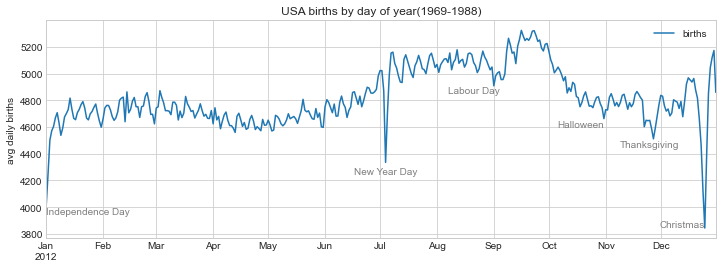

In [59]:
# add labels to the plot
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, 'Independence Day', **style)
ax.text('2012-7-4', 4250, 'New Year Day', ha='center',**style)
ax.text('2012-9-4', 4850, 'Labour Day', ha='right',**style)
ax.text('2012-10-31', 4600, 'Halloween', ha='right',**style)
ax.text('2012-11-25', 4450, 'Thanksgiving', ha='center',**style)
ax.text('2012-12-25', 3850, 'Christmas', ha='right',**style)

# Label the axis
ax.set(title='USA births by day of year(1969-1988)', ylabel='avg daily births');

#Format the x axis with centered month labels
# ax.xaxis.set_major_locator(mpl.dates.MonthLocator())

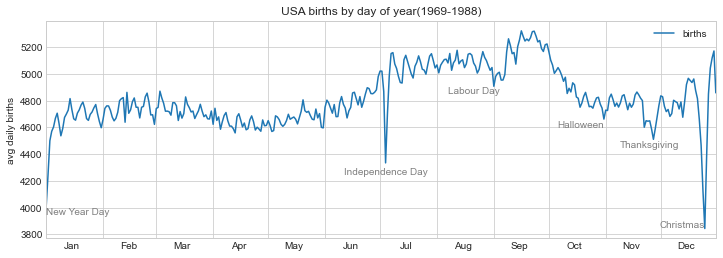

In [83]:
# add labels to the plot
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, 'New Year Day',**style)
ax.text('2012-7-4', 4250, 'Independence Day', ha='center',**style)
ax.text('2012-9-4', 4850, 'Labour Day', ha='right',**style)
ax.text('2012-10-31', 4600, 'Halloween', ha='right',**style)
ax.text('2012-11-25', 4450, 'Thanksgiving', ha='center',**style)
ax.text('2012-12-25', 3850, 'Christmas', ha='right',**style)

# Label the axis
ax.set(title='USA births by day of year(1969-1988)', ylabel='avg daily births');

#Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Text(0.5, 0.1, '. Axes: (.5, .1)')

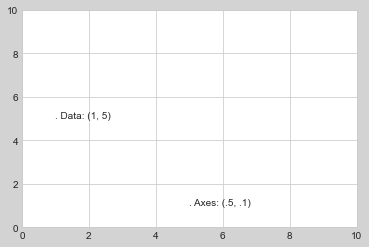

In [73]:
#Transforms
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10]) # xmin, xmax, ymin, ymax


# transData gives usual data coordinates associated with x and y axis labels
ax.text(1, 5,". Data: (1, 5)", transform=ax.transData)
#ax.text(.5, .1, ". Data: (.5, .1)", transform=ax.transData)
ax.text(.5, .1, ". Axes: (.5, .1)", transform=ax.transAxes)

In [68]:
ax.axis?

In [69]:
ax.transData?

In [71]:
ax.text?

In [74]:
ax.transAxes?

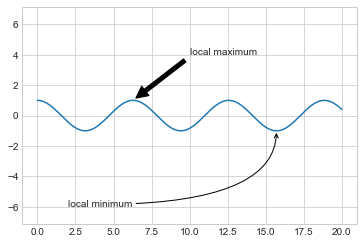

In [79]:
# Arrows and annotations

fig, ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->", 
                                                                                 connectionstyle=
                                                                                 "angle3, angleA=0,angleB=-90"));
                                                                                  

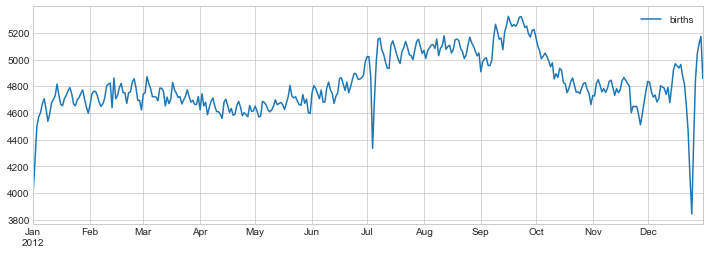

In [80]:
# births again
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

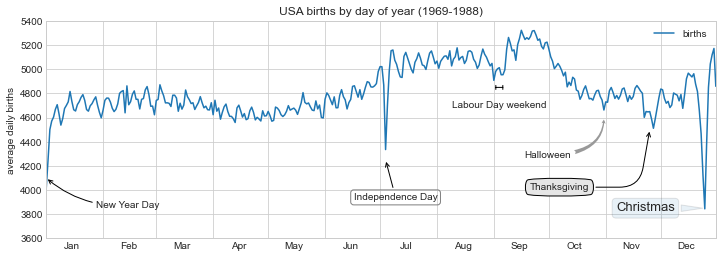

In [105]:
# births again
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);
# add labels
ax.annotate('New Year Day', xy=('2012-1-1', 4100), xycoords='data', xytext=(50, -30), 
            textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", 
                            connectionstyle="arc3, rad=-0.2"))

ax.annotate('Independence Day', xy=('2012-7-4', 4250), xycoords='data', 
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha="center",
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labour Day weekend', xy=('2012-9-4', 4850), xycoords='data', 
            xytext=(0, -20), textcoords='offset points', ha="center")
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
           xycoords='data', textcoords='data', arrowprops={
               'arrowstyle':'|-|,widthA=.2,widthB=.2'     
           })


ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data', 
            xytext=(-80, -40), textcoords='offset points', 
            arrowprops=dict(arrowstyle="fancy",
                           fc=".6", ec="none",
                           connectionstyle="angle3, angleA=0, angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data', 
            bbox=dict(boxstyle="round4, pad=.5", fc=".9"),
            xytext=(-120, -60), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle, angleA=0, angleB=80, rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data', 
            bbox=dict(boxstyle="round", alpha=.1),
            xytext=(-30, 0), textcoords='offset points', size=13, ha='right', va='center',
            arrowprops=dict(arrowstyle="wedge, tail_width=.5", alpha=.1))  
 
    
# label the axes
ax.set(title='USA births by day of year (1969-1988)', ylabel='average daily births')

# Format x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400);

In [93]:
ax.annotate?